# 외국인 따릉이 이용 월별 증감 분석
## 2024년 7-12월 외국인 따릉이 이용량의 월별 변화 추이 및 증감률 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 경고 메시지 숨기기
import warnings
warnings.filterwarnings('ignore')


In [2]:
# 데이터 로드 (cp949 인코딩 사용)
file_path = '서울특별시 공공자전거 외국인 대여정보(일별)_24.7-12.csv'

try:
    df = pd.read_csv(file_path, encoding='cp949')
    print(f"✅ 성공적으로 데이터를 불러왔습니다.")
    print(f"📊 데이터 크기: {df.shape}")
    print(f"📋 컬럼명: {df.columns.tolist()}")
except Exception as e:
    print(f"❌ 데이터 로드 실패: {e}")


✅ 성공적으로 데이터를 불러왔습니다.
📊 데이터 크기: (28116, 4)
📋 컬럼명: ['일시', '대여소명', '대여건수', '반납건수']


In [3]:
# 데이터 전처리
df.columns = ['일시', '대여소명', '대여건수', '반납건수']
print("✅ 컬럼명 정리 완료:", df.columns.tolist())

# 데이터 타입 변환
df['일시'] = pd.to_datetime(df['일시'])
df['대여건수'] = pd.to_numeric(df['대여건수'], errors='coerce').fillna(0)
df['반납건수'] = pd.to_numeric(df['반납건수'], errors='coerce').fillna(0)

# 월 정보 추가
df['년월'] = df['일시'].dt.to_period('M')
df['월'] = df['일시'].dt.month

print("\n✅ 데이터 전처리 완료:")
print(f"📅 분석 기간: {df['일시'].min().strftime('%Y-%m-%d')} ~ {df['일시'].max().strftime('%Y-%m-%d')}")
print(f"📈 총 대여건수: {df['대여건수'].sum():,}건")
print(f"📉 총 반납건수: {df['반납건수'].sum():,}건")


✅ 컬럼명 정리 완료: ['일시', '대여소명', '대여건수', '반납건수']

✅ 데이터 전처리 완료:
📅 분석 기간: 2024-07-01 ~ 2024-12-31
📈 총 대여건수: 31,776건
📉 총 반납건수: 31,265건


In [4]:
# 월별 집계 및 기본 통계
monthly_stats = df.groupby('년월').agg({
    '대여건수': 'sum',
    '반납건수': 'sum'
}).reset_index()

monthly_stats['총_이용건수'] = monthly_stats['대여건수'] + monthly_stats['반납건수']
monthly_stats['년월_str'] = monthly_stats['년월'].astype(str)

print("=== 📊 월별 외국인 따릉이 이용 현황 ===")
print(monthly_stats[['년월_str', '대여건수', '반납건수', '총_이용건수']])

# 월별 증감률 계산 (전월 대비)
monthly_stats['대여_증감률'] = monthly_stats['대여건수'].pct_change() * 100
monthly_stats['반납_증감률'] = monthly_stats['반납건수'].pct_change() * 100
monthly_stats['총이용_증감률'] = monthly_stats['총_이용건수'].pct_change() * 100

print("\n=== 📈 월별 증감률 (전월 대비) ===")
for idx, row in monthly_stats.iterrows():
    if idx == 0:
        print(f"📅 {row['년월_str']}: 기준월")
        print(f"   대여: {row['대여건수']:,}건, 반납: {row['반납건수']:,}건, 총: {row['총_이용건수']:,}건")
    else:
        rental_icon = "📈" if row['대여_증감률'] > 0 else "📉" if row['대여_증감률'] < 0 else "➡️"
        return_icon = "📈" if row['반납_증감률'] > 0 else "📉" if row['반납_증감률'] < 0 else "➡️"
        total_icon = "📈" if row['총이용_증감률'] > 0 else "📉" if row['총이용_증감률'] < 0 else "➡️"
        
        print(f"📅 {row['년월_str']}:")
        print(f"   {rental_icon} 대여: {row['대여_증감률']:+.1f}% ({row['대여건수']:,}건)")
        print(f"   {return_icon} 반납: {row['반납_증감률']:+.1f}% ({row['반납건수']:,}건)")
        print(f"   {total_icon} 총이용: {row['총이용_증감률']:+.1f}% ({row['총_이용건수']:,}건)")
        print()


=== 📊 월별 외국인 따릉이 이용 현황 ===
    년월_str  대여건수  반납건수  총_이용건수
0  2024-07  6602  6493   13095
1  2024-08  5091  5024   10115
2  2024-09  7271  7143   14414
3  2024-10  7108  6989   14097
4  2024-11  4296  4231    8527
5  2024-12  1408  1385    2793

=== 📈 월별 증감률 (전월 대비) ===
📅 2024-07: 기준월
   대여: 6,602건, 반납: 6,493건, 총: 13,095건
📅 2024-08:
   📉 대여: -22.9% (5,091건)
   📉 반납: -22.6% (5,024건)
   📉 총이용: -22.8% (10,115건)

📅 2024-09:
   📈 대여: +42.8% (7,271건)
   📈 반납: +42.2% (7,143건)
   📈 총이용: +42.5% (14,414건)

📅 2024-10:
   📉 대여: -2.2% (7,108건)
   📉 반납: -2.2% (6,989건)
   📉 총이용: -2.2% (14,097건)

📅 2024-11:
   📉 대여: -39.6% (4,296건)
   📉 반납: -39.5% (4,231건)
   📉 총이용: -39.5% (8,527건)

📅 2024-12:
   📉 대여: -67.2% (1,408건)
   📉 반납: -67.3% (1,385건)
   📉 총이용: -67.2% (2,793건)



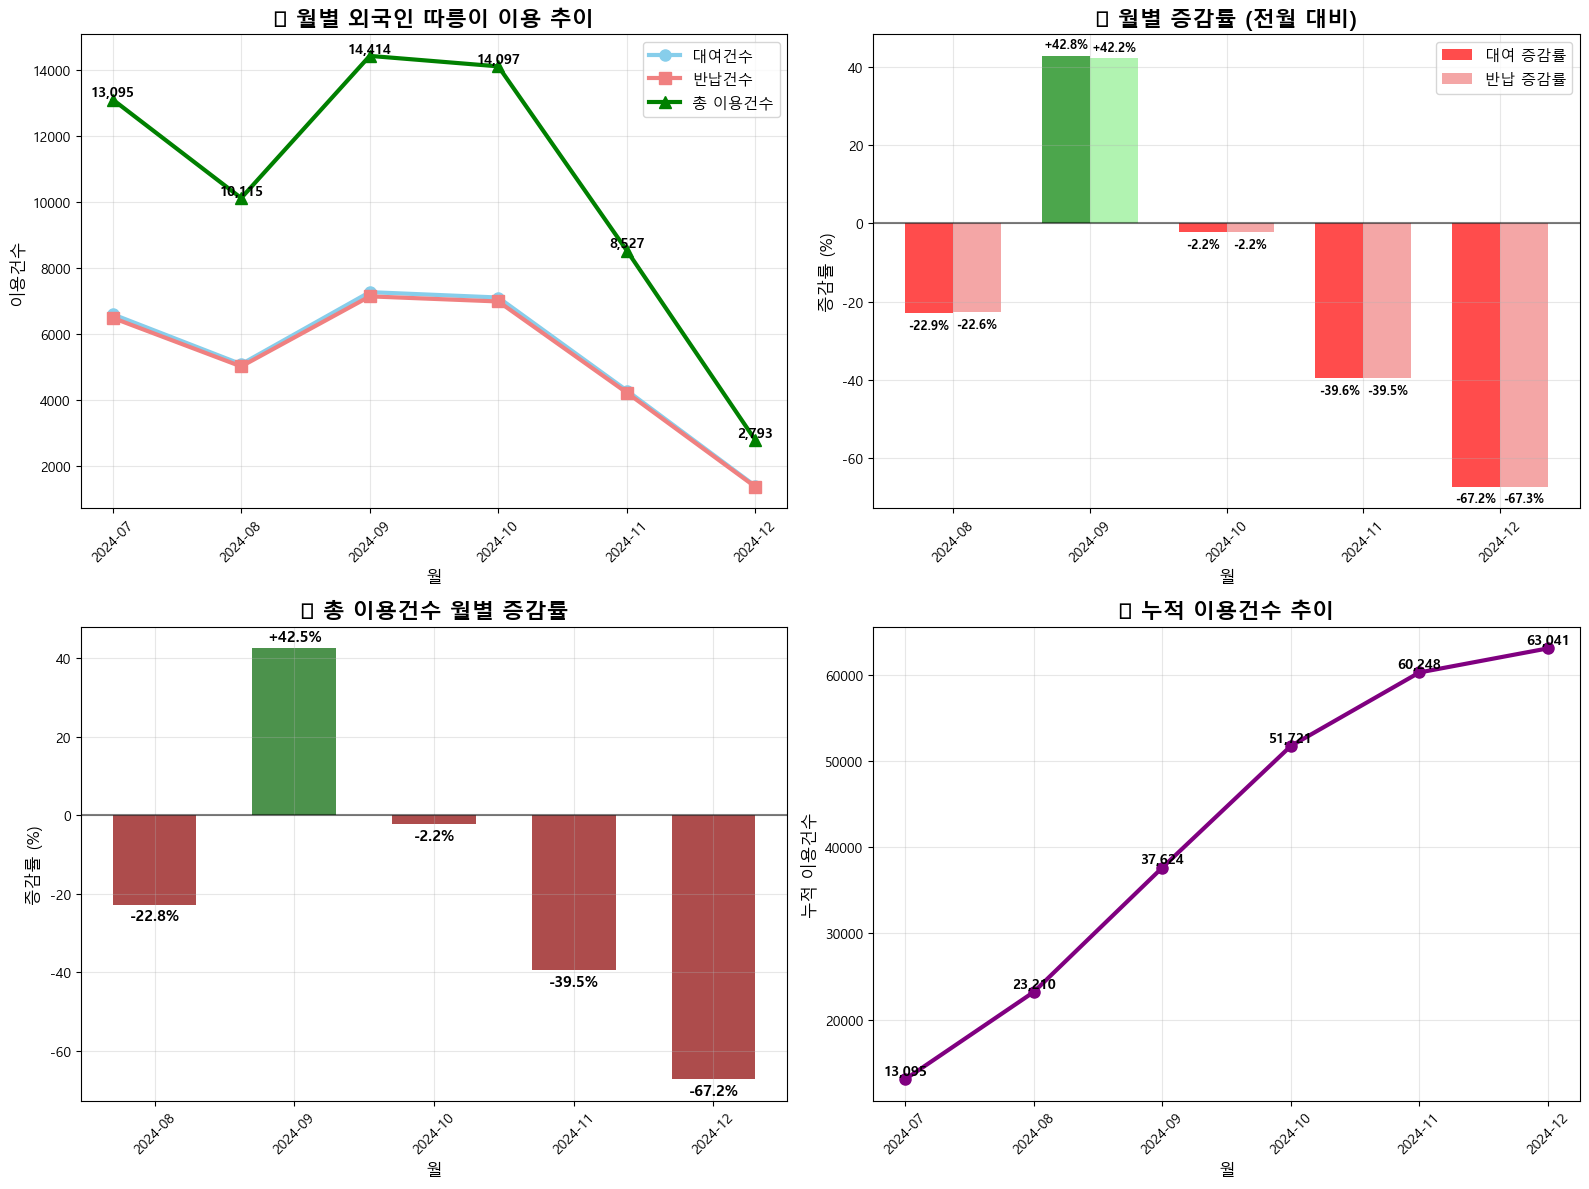

In [5]:
# 월별 트렌드 시각화
plt.figure(figsize=(16, 12))

# 1. 월별 이용건수 추이
plt.subplot(2, 2, 1)
plt.plot(monthly_stats['년월_str'], monthly_stats['대여건수'], 
         marker='o', linewidth=3, markersize=8, label='대여건수', color='skyblue')
plt.plot(monthly_stats['년월_str'], monthly_stats['반납건수'], 
         marker='s', linewidth=3, markersize=8, label='반납건수', color='lightcoral')
plt.plot(monthly_stats['년월_str'], monthly_stats['총_이용건수'], 
         marker='^', linewidth=3, markersize=8, label='총 이용건수', color='green')

plt.title('📈 월별 외국인 따릉이 이용 추이', fontsize=16, fontweight='bold')
plt.ylabel('이용건수', fontsize=12)
plt.xlabel('월', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 값 표시
for i, row in monthly_stats.iterrows():
    plt.text(i, row['총_이용건수'] + 100, f"{row['총_이용건수']:,}", 
             ha='center', fontsize=10, fontweight='bold')

# 2. 월별 증감률
plt.subplot(2, 2, 2)
if len(monthly_stats) > 1:
    months_with_change = monthly_stats[1:]['년월_str'].tolist()
    rental_changes = monthly_stats[1:]['대여_증감률'].tolist()
    return_changes = monthly_stats[1:]['반납_증감률'].tolist()
    
    x = range(len(months_with_change))
    width = 0.35
    
    # 색상을 증감에 따라 다르게 설정
    rental_colors = ['green' if val > 0 else 'red' if val < 0 else 'gray' for val in rental_changes]
    return_colors = ['lightgreen' if val > 0 else 'lightcoral' if val < 0 else 'lightgray' for val in return_changes]
    
    plt.bar([i - width/2 for i in x], rental_changes, width, 
            label='대여 증감률', color=rental_colors, alpha=0.7)
    plt.bar([i + width/2 for i in x], return_changes, width, 
            label='반납 증감률', color=return_colors, alpha=0.7)
    
    plt.title('📊 월별 증감률 (전월 대비)', fontsize=16, fontweight='bold')
    plt.ylabel('증감률 (%)', fontsize=12)
    plt.xlabel('월', fontsize=12)
    plt.legend(fontsize=11)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    plt.xticks(x, months_with_change, rotation=45)
    plt.grid(True, alpha=0.3)
    
    # 값 표시
    for i, (rental, return_val) in enumerate(zip(rental_changes, return_changes)):
        plt.text(i - width/2, rental + (2 if rental > 0 else -4), f"{rental:+.1f}%", 
                 ha='center', fontsize=9, fontweight='bold')
        plt.text(i + width/2, return_val + (2 if return_val > 0 else -4), f"{return_val:+.1f}%", 
                 ha='center', fontsize=9, fontweight='bold')

# 3. 총 이용건수 증감률
plt.subplot(2, 2, 3)
if len(monthly_stats) > 1:
    total_changes = monthly_stats[1:]['총이용_증감률'].tolist()
    total_colors = ['darkgreen' if val > 0 else 'darkred' if val < 0 else 'gray' for val in total_changes]
    
    plt.bar(x, total_changes, color=total_colors, alpha=0.7, width=0.6)
    plt.title('📈 총 이용건수 월별 증감률', fontsize=16, fontweight='bold')
    plt.ylabel('증감률 (%)', fontsize=12)
    plt.xlabel('월', fontsize=12)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    plt.xticks(x, months_with_change, rotation=45)
    plt.grid(True, alpha=0.3)
    
    # 값 표시
    for i, val in enumerate(total_changes):
        plt.text(i, val + (2 if val > 0 else -4), f"{val:+.1f}%", 
                 ha='center', fontsize=11, fontweight='bold')

# 4. 누적 이용건수
plt.subplot(2, 2, 4)
cumulative = monthly_stats['총_이용건수'].cumsum()
plt.plot(monthly_stats['년월_str'], cumulative, 
         marker='o', linewidth=3, markersize=8, color='purple')
plt.title('📊 누적 이용건수 추이', fontsize=16, fontweight='bold')
plt.ylabel('누적 이용건수', fontsize=12)
plt.xlabel('월', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 값 표시
for i, val in enumerate(cumulative):
    plt.text(i, val + 500, f"{val:,}", ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


In [6]:
# 월별 인기 장소 TOP 5 변화
print("=== 🏆 월별 인기 대여소 TOP 5 변화 ===\n")

for month in sorted(df['년월'].unique()):
    month_data = df[df['년월'] == month]
    month_top5_rental = month_data.groupby('대여소명')['대여건수'].sum().nlargest(5)
    month_top5_return = month_data.groupby('대여소명')['반납건수'].sum().nlargest(5)
    
    print(f"📅 {month} 월별 TOP 5:")
    print("🚴‍♂️ 대여 TOP 5:")
    for i, (station, count) in enumerate(month_top5_rental.items(), 1):
        station_short = station[:35] + '...' if len(station) > 35 else station
        print(f"  {i}. {station_short}: {count:,}건")
    
    print("🏁 반납 TOP 5:")
    for i, (station, count) in enumerate(month_top5_return.items(), 1):
        station_short = station[:35] + '...' if len(station) > 35 else station
        print(f"  {i}. {station_short}: {count:,}건")
    print("-" * 80)


=== 🏆 월별 인기 대여소 TOP 5 변화 ===

📅 2024-07 월별 TOP 5:
🚴‍♂️ 대여 TOP 5:
  1. 207. 여의나루역 1번출구 앞: 190건
  2. 4217. 한강공원 망원나들목: 97건
  3. 474.동대문역사문화공원역 1번출구 뒤편: 86건
  4. 3515. 서울숲 관리사무소: 78건
  5. 502. 자양(뚝섬한강공원)역 1번출구 앞: 71건
🏁 반납 TOP 5:
  1. 207. 여의나루역 1번출구 앞: 145건
  2. 4217. 한강공원 망원나들목: 96건
  3. 502. 자양(뚝섬한강공원)역 1번출구 앞: 85건
  4. 2525.반포쇼핑타운 2동 앞: 71건
  5. 4791. 명동역9번 출구: 69건
--------------------------------------------------------------------------------
📅 2024-08 월별 TOP 5:
🚴‍♂️ 대여 TOP 5:
  1. 207. 여의나루역 1번출구 앞: 130건
  2. 4217. 한강공원 망원나들목: 107건
  3. 3515. 서울숲 관리사무소: 62건
  4. 474.동대문역사문화공원역 1번출구 뒤편: 58건
  5. 2217.아크로리버뷰 부지 앞: 55건
🏁 반납 TOP 5:
  1. 207. 여의나루역 1번출구 앞: 132건
  2. 4217. 한강공원 망원나들목: 84건
  3. 2217.아크로리버뷰 부지 앞: 81건
  4. 825. 서빙고동 주민센터 앞: 79건
  5. 502. 자양(뚝섬한강공원)역 1번출구 앞: 67건
--------------------------------------------------------------------------------
📅 2024-09 월별 TOP 5:
🚴‍♂️ 대여 TOP 5:
  1. 207. 여의나루역 1번출구 앞: 214건
  2. 502. 자양(뚝섬한강공원)역 1번출구 앞: 124건
  3. 3515. 서울숲 관리사무소: 100건
  4. 2525.

In [7]:
# 월별 상세 분석 및 특이사항
print("=" * 80)
print("📊 월별 분석 결과 종합 요약")
print("=" * 80)
print(f"🗓️  분석 기간: {monthly_stats['년월_str'].iloc[0]} ~ {monthly_stats['년월_str'].iloc[-1]}")
print(f"📊 총 분석 개월 수: {len(monthly_stats)}개월")

# 가장 이용량이 많았던 월과 적었던 월
max_month_idx = monthly_stats['총_이용건수'].idxmax()
min_month_idx = monthly_stats['총_이용건수'].idxmin()

print(f"\n🔥 가장 활발했던 월: {monthly_stats.iloc[max_month_idx]['년월_str']}")
print(f"   총 이용: {monthly_stats.iloc[max_month_idx]['총_이용건수']:,}건")
print(f"   (대여: {monthly_stats.iloc[max_month_idx]['대여건수']:,}, 반납: {monthly_stats.iloc[max_month_idx]['반납건수']:,})")

print(f"\n❄️ 가장 저조했던 월: {monthly_stats.iloc[min_month_idx]['년월_str']}")
print(f"   총 이용: {monthly_stats.iloc[min_month_idx]['총_이용건수']:,}건")
print(f"   (대여: {monthly_stats.iloc[min_month_idx]['대여건수']:,}, 반납: {monthly_stats.iloc[min_month_idx]['반납건수']:,})")

# 최대 증가율과 최대 감소율
if len(monthly_stats) > 1:
    valid_changes = monthly_stats.dropna(subset=['총이용_증감률'])
    if len(valid_changes) > 0:
        max_increase_idx = valid_changes['총이용_증감률'].idxmax()
        max_decrease_idx = valid_changes['총이용_증감률'].idxmin()
        
        print(f"\n📈 최대 증가: {monthly_stats.iloc[max_increase_idx]['년월_str']}")
        print(f"   증가율: {monthly_stats.iloc[max_increase_idx]['총이용_증감률']:+.1f}%")
        
        print(f"\n📉 최대 감소: {monthly_stats.iloc[max_decrease_idx]['년월_str']}")
        print(f"   감소율: {monthly_stats.iloc[max_decrease_idx]['총이용_증감률']:+.1f}%")

# 전체 기간 평균 월별 이용량
avg_monthly_usage = monthly_stats['총_이용건수'].mean()
print(f"\n📊 월평균 이용건수: {avg_monthly_usage:,.0f}건")
print(f"📈 월평균 대여건수: {monthly_stats['대여건수'].mean():,.0f}건")
print(f"📉 월평균 반납건수: {monthly_stats['반납건수'].mean():,.0f}건")

# 계절별 특성 분석
summer_months = monthly_stats[monthly_stats['년월'].astype(str).str.contains('2024-0[789]')]
autumn_months = monthly_stats[monthly_stats['년월'].astype(str).str.contains('2024-(10|11)')]
winter_months = monthly_stats[monthly_stats['년월'].astype(str).str.contains('2024-12')]

print(f"\n🌡️  계절별 분석:")
if len(summer_months) > 0:
    summer_avg = summer_months['총_이용건수'].mean()
    print(f"🌞 여름 평균 (7-9월): {summer_avg:,.0f}건")

if len(autumn_months) > 0:
    autumn_avg = autumn_months['총_이용건수'].mean()
    print(f"🍂 가을 평균 (10-11월): {autumn_avg:,.0f}건")
    
if len(winter_months) > 0:
    winter_avg = winter_months['총_이용건수'].mean()
    print(f"❄️ 겨울 (12월): {winter_avg:,.0f}건")

# 계절간 비교
if len(summer_months) > 0 and len(autumn_months) > 0:
    seasonal_diff = ((autumn_avg - summer_avg) / summer_avg) * 100
    print(f"🌡️  여름→가을 변화율: {seasonal_diff:+.1f}%")

if len(autumn_months) > 0 and len(winter_months) > 0:
    winter_diff = ((winter_avg - autumn_avg) / autumn_avg) * 100
    print(f"🌡️  가을→겨울 변화율: {winter_diff:+.1f}%")

print(f"\n=== 📈 전체 트렌드 해석 ===")
# 전체 트렌드 계산
total_change = ((monthly_stats.iloc[-1]['총_이용건수'] - monthly_stats.iloc[0]['총_이용건수']) / monthly_stats.iloc[0]['총_이용건수']) * 100

if total_change > 0:
    print(f"📈 전체적으로 증가 추세: {total_change:+.1f}% (7월 대비 12월)")
    print(f"💡 외국인 관광객의 따릉이 이용이 증가하고 있습니다.")
elif total_change < 0:
    print(f"📉 전체적으로 감소 추세: {total_change:+.1f}% (7월 대비 12월)")
    print(f"💡 외국인 관광객의 따릉이 이용이 감소하고 있습니다.")
else:
    print(f"➡️  전체적으로 안정적: {total_change:+.1f}% (7월 대비 12월)")
    print(f"💡 외국인 관광객의 따릉이 이용이 안정적입니다.")

# 변동성 분석
volatility = monthly_stats['총이용_증감률'].std()
if not pd.isna(volatility):
    print(f"\n📊 월별 변동성 (표준편차): {volatility:.1f}%")
    if volatility > 20:
        print(f"💡 변동성이 높아 월별 이용패턴이 불안정합니다.")
    elif volatility > 10:
        print(f"💡 변동성이 보통 수준으로 계절적 영향이 있습니다.")
    else:
        print(f"💡 변동성이 낮아 월별 이용패턴이 안정적입니다.")

print(f"\n" + "=" * 80)


📊 월별 분석 결과 종합 요약
🗓️  분석 기간: 2024-07 ~ 2024-12
📊 총 분석 개월 수: 6개월

🔥 가장 활발했던 월: 2024-09
   총 이용: 14,414건
   (대여: 7,271, 반납: 7,143)

❄️ 가장 저조했던 월: 2024-12
   총 이용: 2,793건
   (대여: 1,408, 반납: 1,385)

📈 최대 증가: 2024-09
   증가율: +42.5%

📉 최대 감소: 2024-12
   감소율: -67.2%

📊 월평균 이용건수: 10,507건
📈 월평균 대여건수: 5,296건
📉 월평균 반납건수: 5,211건

🌡️  계절별 분석:
🌞 여름 평균 (7-9월): 12,541건
🍂 가을 평균 (10-11월): 11,312건
❄️ 겨울 (12월): 2,793건
🌡️  여름→가을 변화율: -9.8%
🌡️  가을→겨울 변화율: -75.3%

=== 📈 전체 트렌드 해석 ===
📉 전체적으로 감소 추세: -78.7% (7월 대비 12월)
💡 외국인 관광객의 따릉이 이용이 감소하고 있습니다.

📊 월별 변동성 (표준편차): 41.3%
💡 변동성이 높아 월별 이용패턴이 불안정합니다.

